### The Impact of Large Sample Sizes

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

In [32]:
full_data

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226
...,...,...,...,...
2969,5984,>=21,True,68.544084
2970,5302,<21,True,63.822921
2971,5978,>=21,True,67.298275
2972,3900,<21,False,60.095933


`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to state the null and alternative hypotheses for these cases in the cell below. 


h0 mean =67.60\
h1 mean != 67.60

In [3]:
full_data['height'].mean()

67.59748697307937

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 
Use **quiz 2** below to assure your answers are correct.  

In [33]:
# The population mean 
full_data['height'].mean()

67.59748697307937

In [34]:
# The population standard deviation 
full_data['height'].std()

3.119433206550344

In [35]:
sample_df = full_data.sample(5)

In [36]:
sample_df['height'].mean()

67.88234252049084

In [43]:
sample_list = []
for _ in range(10000):
    sample = sample_df.sample(5, replace=True)
    sample_mean = sample['height'].mean()
    sample_list.append(sample_mean)

(array([  40.,  184.,  786., 1496., 2273., 2347., 1648.,  809.,  359.,
          58.]),
 array([64.3571538 , 65.05835045, 65.75954709, 66.46074374, 67.16194038,
        67.86313703, 68.56433367, 69.26553032, 69.96672696, 70.66792361,
        71.36912025]),
 <BarContainer object of 10 artists>)

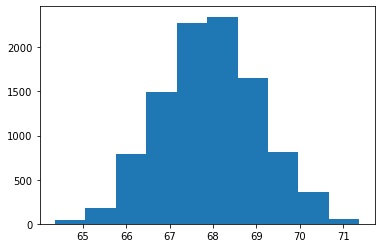

In [44]:
plt.hist(sample_list)

In [46]:
np.std(sample_list)

1.141199765546674

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

h0: mean = 67.60\
h1: mean != 67.60

In [55]:
# p-value 구하기

In [52]:
from scipy import stats

In [53]:
p = stats.ttest_1samp(sample_list, 67.60)

In [54]:
p

Ttest_1sampResult(statistic=26.571387609302636, pvalue=2.2293573377210066e-150)

### p-value구하기 다른 방법

In [58]:
null_mean = 67.60
null_vals = np.random.normal(null_mean,np.std(sample_list), 10000)

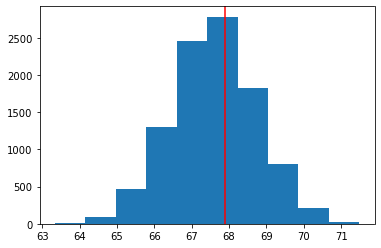

In [61]:
plt.hist(null_vals)
plt.axvline(x=sample_df['height'].mean(), color='red')

In [62]:
# for a two sided hypothesis, we want to loot at anything 
# 양측으로 검정 
obs_mean = sample_df.height.mean()

In [65]:
# 통계량이 관찰된것보다 높을 확률 구하기 => p-value 구하기 
prob_more_extreme_high = (null_vals > obs_mean).mean()
print(prob_more_extreme_high)

0.403


In [67]:
# 통계량이 관찰된것보다 적을 확률 구하기 
prob_more_extreme_low = (null_mean - (obs_mean - null_mean)> null_vals).mean()
prob_more_extreme_low

0.4031

In [72]:
p_val = prob_more_extreme_low + prob_more_extreme_high
p_val

0.8061

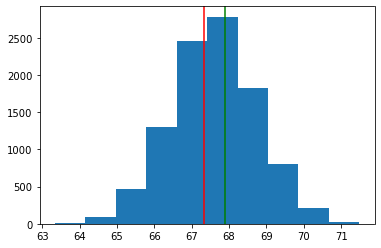

In [74]:
upper_bound = obs_mean 
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals)
plt.axvline(x=lower_bound, color='red')
plt.axvline(x=upper_bound, color='green')


`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

In [102]:
sample2 = full_data.sample(300)

In [103]:
# sample2' height mean 
sample2.height.mean()

67.65859929806706

In [104]:
# bootsampling 
sample2_list = []
for _ in range(10000):
    sample = sample2.sample(300, replace=True)
    sample_mean = sample.height.mean()
    sample2_list.append(sample_mean)
    

In [105]:
# sample 300 std 
std_sample2 = np.std(sample2_list)
std_sample2

0.17686993766391831

In [106]:
null_vals = np.random.normal(null_mean, std_sample2, 10000)

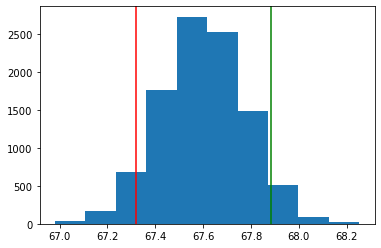

In [107]:
upper_bound = obs_mean 
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals)
plt.axvline(x=lower_bound, color='red')
plt.axvline(x=upper_bound, color='green')

In [108]:
# p-value 구하기 

# probability of a statistic lower than observed 
prob_more_extreme_low = (null_vals < lower_bound).mean()
prob_more_extreme_low

0.0533

In [109]:
# probability a statistic is more extreme higher 
prob_more_extreme_high = (upper_bound < null_vals).mean()
prob_more_extreme_high

0.0543

In [110]:
pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.1076